In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ThinkPad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!pip install sastrawi

In [3]:
!pip install fasttext-wheel wordcloud

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk gensim tensorflow keras
!pip install fasttext-wheel

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Rolling back uninstall of numpy
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy-2.0.2.dist-info\
   from C:\Users\ThinkPad\OneDrive\Documents\Miniconda\Lib\site-packages\~umpy-2.0.2.dist-info
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__config__.py
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-mfntpp3_\__config__.py
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-mfntpp3_\__init__.cython-30.pxd
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__init__.pxd
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-mfntpp3_\__init__.pxd
  Moving

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ThinkPad\\OneDrive\\Documents\\Miniconda\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
import re
from collections import Counter

import pandas as pd
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
url = 'C:/Users/ThinkPad/OneDrive/Documents/Semester 6/NLP/dataset_fix_bersih.csv'
data = pd.read_csv(url, delimiter=",")
data.head()

,tweet,label_emosi
0,fajar noor merasa indah,Senang
1,fajar noor x nabila taqiyyah ku ingin pisah,Sedih
2,fajar noor jangan hilangkan dia,Sedih
3,fajar noor dia,Sedih
4,fajar noor x juicy luicy tanpa tergesa,Senang


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        645 non-null    object
 1   label_emosi  645 non-null    object
dtypes: object(2)
memory usage: 10.2+ KB


In [8]:
# Hapus baris yang memiliki nilai NaN di kolom 'tweet'
data = data.dropna(subset=['tweet'])

<Axes: xlabel='label_emosi'>

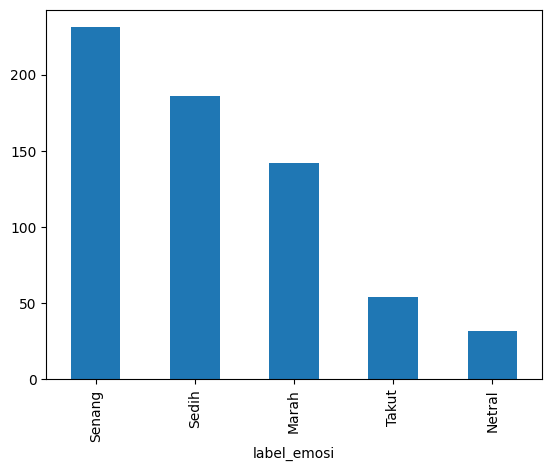

In [9]:
df = data
df['label_emosi'].value_counts().plot(kind='bar')

In [10]:
# Inisialisasi stopword remover & stemmer
stop_factory = StopWordRemoverFactory()
stem_factory = StemmerFactory()

# Ambil stopwords bawaan lalu tambahkan kata-kata tidak penting yang sering muncul
tambahan_stopwords = [
    'yang', 'ga', 'gak', 'nggak', 'aja', 'sih', 'deh', 'dong', 'nih', 'tuh',
    'kayak', 'cuma', 'doang', 'banget', 'lah', 'kan', 'nya', 'itu', 'ini',
    'buat', 'udah', 'masa', 'malah', 'emang', 'ntar', 'dulu', 'kalo', 'biar',
    'semua', 'setiap', 'tetap', 'harus', 'akan', 'sama', 'jadi', 'yg', 'kok', 'gue',
    'udh', 'udah', 'sampe', 'emg', 'gw', 'lw', 'xiii', 'x', 'tak', 'ng', 's', 'to', 'eh',
    'dah', 'jg', 'tp', 'jd', 'tu', 'nang', 'sm', 'punya', 'ni', 'ama'
]

stopwords = set(stop_factory.get_stop_words())
stopwords.update(tambahan_stopwords)

stemmer = stem_factory.create_stemmer()

# Fungsi pembersih teks
def preprocess(teks):
    if not isinstance(teks, str):
        return ''

    teks = teks.lower()
    teks = re.sub(r'[^a-z\s]', '', teks)
    tokens = teks.split()

    tokens = [t for t in tokens if t not in stopwords]
    tokens = [stemmer.stem(t) for t in tokens]

    return ' '.join(tokens)

# Asumsikan kamu sudah punya DataFrame bernama data dengan kolom 'tweet'
# Jika belum, load CSV misalnya:
# data = pd.read_csv('nama_file.csv')

# Hindari error akibat NaN
data['tweet'] = data['tweet'].fillna('')

# Bersihkan semua tweet → simpan ke kolom baru
data['tweet_clean'] = data['tweet'].apply(preprocess)

# Gabungkan semua teks bersih
all_text = ' '.join(data['tweet_clean'])
processed_tokens = all_text.split()

# Hitung frekuensi kata
counter = Counter(processed_tokens)

# Tampilkan 10 kata paling sering
print("🔟 Kata paling sering setelah stopword & imbuhan dihapus:")
for word, count in counter.most_common(10):
    print(f"{word}: {count}")

🔟 Kata paling sering setelah stopword & imbuhan dihapus:
idol: 459
fajar: 444
indonesian: 232
shabrina: 189
noor: 159
amanda: 147
season: 89
leanor: 68
lagu: 64
selingkuh: 63


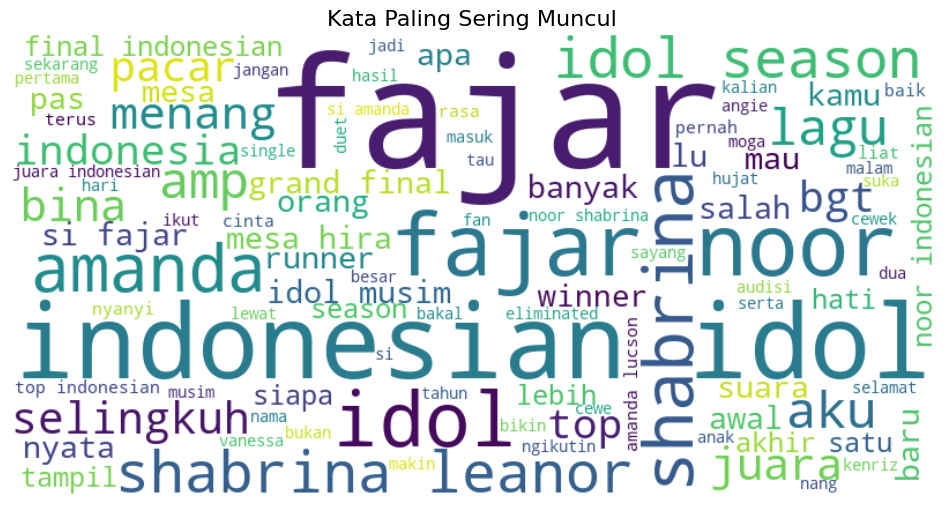

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks hasil bersih jadi satu string
text_string = ' '.join(data['tweet_clean'])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_string)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Paling Sering Muncul", fontsize=16)
plt.show()

In [12]:
X = data["tweet_clean"]
y = data["label_emosi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Tokenisasi

Tokenisasi dengan Bag of Words (BoW)

In [13]:
# Inisialisasi CountVectorizer
bow_vectorizer = CountVectorizer()

# Fit ke data latih, transform ke data latih dan uji
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Cek bentuk hasil
print("Shape BoW train:", X_train_bow.shape)
print("Shape BoW test :", X_test_bow.shape)

Shape BoW train: (516, 2894)
Shape BoW test : (129, 2894)


In [14]:
# Tampilkan bentuk vektornya
print(X_train_bow.toarray())  # Setiap baris = 1 dokumen/tweet

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Tokenisasi dengan TF-IDF

In [15]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
print(X_train_tfidf)

  (0, 1552)	0.39148713280856023
  (0, 1315)	0.23288920864964388
  (0, 1013)	0.20663856704877143
  (0, 1878)	0.1409463275034785
  (0, 1186)	0.1836831916433237
  (0, 1019)	0.2008006233015181
  (0, 2038)	0.20663856704877143
  (0, 228)	0.3148651000849025
  (0, 2630)	0.23288920864964388
  (0, 2082)	0.16719696910435097
  (0, 1899)	0.17735657440034217
  (0, 423)	0.20663856704877143
  (0, 2267)	0.18729274736414028
  (0, 1277)	0.2219942080051526
  (0, 1877)	0.23288920864964388
  (0, 416)	0.21354338896501276
  (0, 2737)	0.23288920864964388
  (0, 1430)	0.20663856704877143
  (0, 1978)	0.23288920864964388
  (0, 759)	0.062473899692379334
  (0, 1806)	0.09163918448124324
  (0, 1100)	0.07977210339049727
  (0, 1062)	0.06042628370586617
  (1, 759)	0.1939204448565871
  (1, 1806)	0.2844501705256162
  :	:
  (515, 865)	0.1714322538265501
  (515, 312)	0.139693807129871
  (515, 110)	0.26520188944267103
  (515, 2167)	0.14102776848889678
  (515, 2722)	0.13481077555278725
  (515, 2650)	0.12492863030650295
  (515,

Pemodelan

MultinomialNB + TF-IDF

In [17]:
# 1. Inisialisasi model
nb = MultinomialNB()

# 2. Training
nb.fit(X_train_tfidf, y_train)

# 3. Prediksi
y_pred = nb.predict(X_test_tfidf)

# 4. Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6201550387596899

Classification Report:
               precision    recall  f1-score   support

       Marah       0.92      0.43      0.59        28
      Netral       0.00      0.00      0.00         2
       Sedih       0.63      0.43      0.51        44
      Senang       0.57      1.00      0.73        49
       Takut       0.00      0.00      0.00         6

    accuracy                           0.62       129
   macro avg       0.43      0.37      0.36       129
weighted avg       0.63      0.62      0.58       129



c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

MultinomialNB + BoW

In [18]:
# Model
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Prediksi dan Evaluasi
y_pred = model.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6589147286821705
              precision    recall  f1-score   support

       Marah       0.76      0.46      0.58        28
      Netral       1.00      0.50      0.67         2
       Sedih       0.63      0.50      0.56        44
      Senang       0.65      0.96      0.78        49
       Takut       0.50      0.33      0.40         6

    accuracy                           0.66       129
   macro avg       0.71      0.55      0.60       129
weighted avg       0.67      0.66      0.64       129



SVC + TF-IDF

In [19]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6821705426356589

Classification Report:
               precision    recall  f1-score   support

       Marah       0.79      0.54      0.64        28
      Netral       1.00      0.50      0.67         2
       Sedih       0.62      0.55      0.58        44
      Senang       0.70      0.92      0.80        49
       Takut       0.50      0.50      0.50         6

    accuracy                           0.68       129
   macro avg       0.72      0.60      0.64       129
weighted avg       0.69      0.68      0.67       129



SVM + BoW

In [20]:
model = LinearSVC()
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6356589147286822

Classification Report:
               precision    recall  f1-score   support

       Marah       0.74      0.50      0.60        28
      Netral       0.50      0.50      0.50         2
       Sedih       0.57      0.52      0.55        44
      Senang       0.68      0.84      0.75        49
       Takut       0.38      0.50      0.43         6

    accuracy                           0.64       129
   macro avg       0.57      0.57      0.56       129
weighted avg       0.64      0.64      0.63       129

